In [32]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

dataset1 = np.load('hw2_material/kmeans/dataset1.npy')
dataset2 = np.load('hw2_material/kmeans/dataset2.npy') 
dataset3 = np.load('hw2_material/kmeans/dataset3.npy')
dataset4 = np.load('hw2_material/kmeans/dataset4.npy')

(7482, 2)
(7673, 2)
(14201, 2)
(9842, 2)


In [23]:
def assign_clusters(data, cluster_centers):
    """
    Assigns every data point to its closest (in terms of Euclidean distance) cluster center.
    :param data: An (N, D) shaped numpy array where N is the number of examples
    and D is the dimension of the data
    :param cluster_centers: A (K, D) shaped numpy array where K is the number of clusters
    and D is the dimension of the data
    :return: An (N, ) shaped numpy array. At its index i, the index of the closest center
    resides to the ith data point.
    """
    
    assigned_to = np.empty(0)
    distances = np.empty(0)
    i = 0
    
    for single_data in data: #iterating through each data
        for cluster in cluster_centers:   #iterating through each cluster center
            a, b = single_data
            c, d = cluster
            distance = math.sqrt(pow(a-c, 2) + pow(b-d, 2))  #euclidean distance
            distances = np.append(distances, distance)
        
        smallest_distance = distances[0]
        smallest_distance_index = 0
        for distance in distances:  #finding smallest distance
            if(distance < smallest_distance):
                smallest_distance = distance
                smallest_distance_index = i
            i+=1    
        i=0
        assigned_to = np.append(assigned_to, smallest_distance_index)
        distances = np.empty(0)
        
    return assigned_to
    

In [24]:
def calculate_cluster_centers(data, assignments, cluster_centers, k):
    """
    Calculates cluster_centers such that their squared Euclidean distance to the data assigned to
    them will be lowest.
    If none of the data points belongs to some cluster center, then assign it to its previous value.
    :param data: An (N, D) shaped numpy array where N is the number of examples
    and D is the dimension of the data
    :param assignments: An (N, ) shaped numpy array with integers inside. They represent the cluster index
    every data assigned to.
    :param cluster_centers: A (K, D) shaped numpy array where K is the number of clusters
    and D is the dimension of the data
    :param k: Number of clusters
    :return: A (K, D) shaped numpy array that contains the newly calculated cluster centers.
    """
    cluster_centers_sums_x = np.zeros(k)
    cluster_centers_sums_y = np.zeros(k)
    cluster_centers_totals = np.zeros(k)
    
    i=0
    
    for assignment in assignments:  #incrementing each cluster center's distance 
        cluster_centers_totals[assignment] += 1
        cluster_centers_sums_x[assignment] += data[i][0]
        cluster_centers_sums_y[assignment] += data[i][1]
        i+=1
        
    new_cluster_centers = np.empty([k,2])
    i=0
    
    for j in range(k):  #averaging each cluster center's distance
        if(cluster_centers_totals[i] != 0):
            new_cluster_centers[i][0] = cluster_centers_sums_x[i]/cluster_centers_totals[i]
            new_cluster_centers[i][1] = cluster_centers_sums_y[i]/cluster_centers_totals[i]
        else:
            new_cluster_centers[i][0] = cluster_centers[i][0]
            new_cluster_centers[i][1] = cluster_centers[i][1]
        i+=1
        
    return new_cluster_centers
        
    

In [25]:
def kmeans(data, initial_cluster_centers):
    """
    Applies k-means algorithm.
    :param data: An (N, D) shaped numpy array where N is the number of examples
    and D is the dimension of the data
    :param initial_cluster_centers: A (K, D) shaped numpy array where K is the number of clusters
    and D is the dimension of the data
    :return: cluster_centers, objective_function
    cluster_center.shape is (K, D).
    objective function is a float. It is calculated by summing the squared euclidean distance between
    data points and their cluster centers.
    """
    
    prev_assignments = np.empty(0)
    i=0
    cluster_centres = initial_cluster_centers
    
    while True:   #implementing a makeshift do while loop
        assignments = assign_clusters(data, cluster_centres)
        assignments = assignments.astype(np.int32)  #so that the assignment values can be used as indexes
        cluster_centres = calculate_cluster_centers(data, assignments, cluster_centres, cluster_centres.size//2)
        if(np.all(assignments == prev_assignments)):  #if assignments not changing
            break
        prev_assignments = assignments
        
    objective_function = 0
    for assignment in assignments:
        a, b = data[i]
        c, d = cluster_centres[assignment]
        distance = pow(a-c, 2) + pow(b-d, 2)
        objective_function += distance
        i+=1
    
    objective_function /= 2
    
    return cluster_centres, objective_function
    

In [26]:
def cluster_initialization(data, k):
    #data is an array of our data
    #k is the number of clusters
    cluster_centers = np.empty([k,2])
    data_point_total = np.shape(data)[0]
    
    for i in range(k):
        flag = 0
        flag2 = 1
        while flag2 == 1:
            flag = 0
            rand_index = np.random.randint(0, data_point_total-1) #choosing a random datapoint
            for cluster_center in cluster_centers:
                if(np.all(cluster_center == data[rand_index])):  #making sure the same datapoint isn't choosen twice
                    flag = 1
            if(flag == 1):
                flag2 = 1
            else:
                flag2 = 0
       
        cluster_centers[i] = data[rand_index]
        
    return cluster_centers
        

k = 1
i = 0
i = 1


/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/1420274066.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(assignments == prev_assignments)):


i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 2
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 3
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 4
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 5
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 6
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 7
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 8
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 9
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 10
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


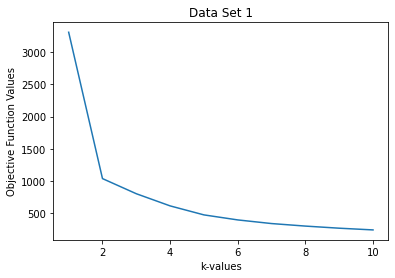

In [38]:
#dataset 1 k vs obj func

smallest_obj_func = 0
smallest_obj_clusters_resultant = np.empty(0)

k_values = np.empty(0)
objective_funcs = np.empty(0)

for i in range(1, 11):
    k_values = np.append(k_values, i)

for k in range(1,11):
    for i in range(10):
        initial_clusters = cluster_initialization(dataset1, k)
        resultant_cluster_centers, obj_function = kmeans(dataset1, initial_clusters)
        if(i == 0):
            smallest_obj_func = obj_function
            smallest_obj_clusters_resultant = resultant_cluster_centers
        else:
            if(obj_function < smallest_obj_func):
                smallest_obj_func = obj_function
                smallest_obj_clusters_resultant = resultant_cluster_centers
    objective_funcs = np.append(objective_funcs, smallest_obj_func)
                
plt.plot(k_values, objective_funcs)
plt.xlabel('k-values')
plt.ylabel('Objective Function Values')
plt.title('Data Set 1')
plt.show()
    

/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/1190245633.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(ass == prev_ass)):


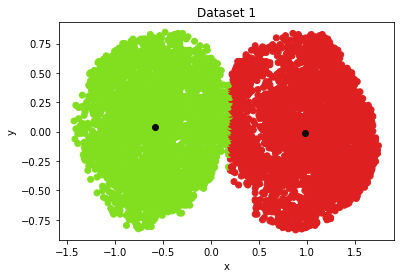

In [64]:
#dataset 1 coloured clusters
colors_defs = ['#DF2020', '#81DF20', '#0D0D0D']
x_vals = np.empty(0)
for i in range(dataset1.size//2):
    x_vals = np.append(x_vals, dataset1[i][0])
    
y_vals = np.empty(0)
for i in range(dataset1.size//2):
    y_vals = np.append(y_vals, dataset1[i][1])
    
prev_ass = np.empty(0)
i=0
cluster_centres = cluster_initialization(dataset1, 2)
    
while True:
    ass = assign_clusters(dataset1, cluster_centres)
    ass = ass.astype(np.int32)
    cluster_centres = calculate_cluster_centers(dataset1, ass, cluster_centres, cluster_centres.size//2)
    if(np.all(ass == prev_ass)):
        break
    prev_ass = ass
    
x_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    x_vals_centroids = np.append(x_vals_centroids, cluster_centres[i][0])
    
y_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    y_vals_centroids = np.append(y_vals_centroids, cluster_centres[i][1])
    
colors = np.empty(0)
for i in range(dataset1.size//2):
    if(ass[i] == 0):
        colors = np.append(colors, colors_defs[0])
    elif(ass[i] == 1):
        colors = np.append(colors, colors_defs[1])

import matplotlib.pyplot as plt
plt.scatter(x_vals, y_vals, c=colors)
plt.scatter(x_vals_centroids, y_vals_centroids, c=colors_defs[2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset 1')
plt.show()

/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/1420274066.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(assignments == prev_assignments)):


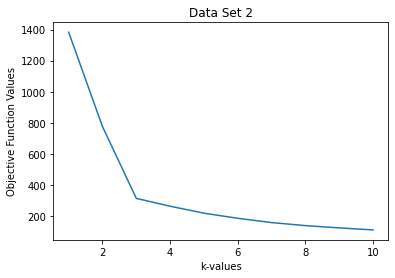

In [44]:
#dataset 2
smallest_obj_func = 0
smallest_obj_clusters_resultant = np.empty(0)

k_values = np.empty(0)
objective_funcs = np.empty(0)

for i in range(1, 11):
    k_values = np.append(k_values, i)

for k in range(1,11):
    #print(f'k = {k}')
    for i in range(10):
        #print(f'i = {i}')
        initial_clusters = cluster_initialization(dataset2, k)
        resultant_cluster_centers, obj_function = kmeans(dataset2, initial_clusters)
        if(i == 0):
            smallest_obj_func = obj_function
            smallest_obj_clusters_resultant = resultant_cluster_centers
        else:
            if(obj_function < smallest_obj_func):
                smallest_obj_func = obj_function
                smallest_obj_clusters_resultant = resultant_cluster_centers
    objective_funcs = np.append(objective_funcs, smallest_obj_func)
                
plt.plot(k_values, objective_funcs)
plt.xlabel('k-values')
plt.ylabel('Objective Function Values')
plt.title('Data Set 2')
plt.show()

/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/3660171732.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(ass == prev_ass)):


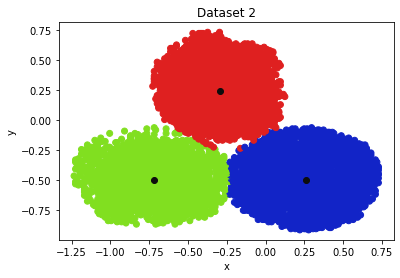

In [65]:
#dtaset 2
colors_defs = ['#DF2020', '#81DF20', '#0D0D0D', '#1224C7']
x_vals = np.empty(0)
for i in range(dataset2.size//2):
    x_vals = np.append(x_vals, dataset2[i][0])
    
y_vals = np.empty(0)
for i in range(dataset2.size//2):
    y_vals = np.append(y_vals, dataset2[i][1])
    
prev_ass = np.empty(0)
i=0
cluster_centres = cluster_initialization(dataset2, 3)
    
while True:
    ass = assign_clusters(dataset2, cluster_centres)
    ass = ass.astype(np.int32)
    cluster_centres = calculate_cluster_centers(dataset2, ass, cluster_centres, cluster_centres.size//2)
    if(np.all(ass == prev_ass)):
        break
    prev_ass = ass
    
x_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    x_vals_centroids = np.append(x_vals_centroids, cluster_centres[i][0])
    
y_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    y_vals_centroids = np.append(y_vals_centroids, cluster_centres[i][1])
    
colors = np.empty(0)
for i in range(dataset2.size//2):
    if(ass[i] == 0):
        colors = np.append(colors, colors_defs[0])
    elif(ass[i] == 1):
        colors = np.append(colors, colors_defs[1])
    elif(ass[i] == 2):
        colors = np.append(colors, colors_defs[3])

import matplotlib.pyplot as plt
plt.scatter(x_vals, y_vals, c=colors)
plt.scatter(x_vals_centroids, y_vals_centroids, c=colors_defs[2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset 2')
plt.show()

k = 1
i = 0


/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/1420274066.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(assignments == prev_assignments)):


i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 2
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 3
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 4
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 5
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 6
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 7
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 8
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 9
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 10
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


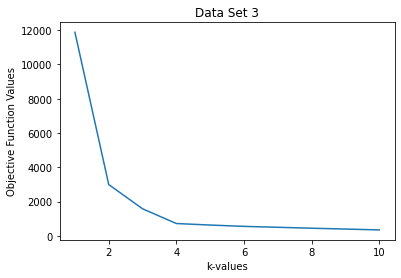

In [42]:
#dataset 3
smallest_obj_func = 0
smallest_obj_clusters_resultant = np.empty(0)

k_values = np.empty(0)
objective_funcs = np.empty(0)

for i in range(1, 11):
    k_values = np.append(k_values, i)

for k in range(1,11):
    print(f'k = {k}')
    for i in range(10):
        print(f'i = {i}')
        initial_clusters = cluster_initialization(dataset3, k)
        resultant_cluster_centers, obj_function = kmeans(dataset3, initial_clusters)
        if(i == 0):
            smallest_obj_func = obj_function
            smallest_obj_clusters_resultant = resultant_cluster_centers
        else:
            if(obj_function < smallest_obj_func):
                smallest_obj_func = obj_function
                smallest_obj_clusters_resultant = resultant_cluster_centers
    objective_funcs = np.append(objective_funcs, smallest_obj_func)
                
plt.plot(k_values, objective_funcs)
plt.xlabel('k-values')
plt.ylabel('Objective Function Values')
plt.title('Data Set 3')
plt.show()

/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/2897882932.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(ass == prev_ass)):


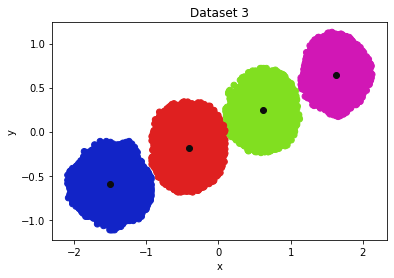

In [67]:
#dataset 3
colors_defs = ['#DF2020', '#81DF20', '#0D0D0D', '#1224C7', '#D117B5']
x_vals = np.empty(0)
for i in range(dataset3.size//2):
    x_vals = np.append(x_vals, dataset3[i][0])
    
y_vals = np.empty(0)
for i in range(dataset3.size//2):
    y_vals = np.append(y_vals, dataset3[i][1])
    
prev_ass = np.empty(0)
i=0
cluster_centres = cluster_initialization(dataset3, 4)
    
while True:
    ass = assign_clusters(dataset3, cluster_centres)
    ass = ass.astype(np.int32)
    cluster_centres = calculate_cluster_centers(dataset3, ass, cluster_centres, cluster_centres.size//2)
    if(np.all(ass == prev_ass)):
        break
    prev_ass = ass
    
x_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    x_vals_centroids = np.append(x_vals_centroids, cluster_centres[i][0])
    
y_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    y_vals_centroids = np.append(y_vals_centroids, cluster_centres[i][1])
    
colors = np.empty(0)
for i in range(dataset3.size//2):
    if(ass[i] == 0):
        colors = np.append(colors, colors_defs[0])
    elif(ass[i] == 1):
        colors = np.append(colors, colors_defs[1])
    elif(ass[i] == 2):
        colors = np.append(colors, colors_defs[3])
    elif(ass[i] == 3):
        colors = np.append(colors, colors_defs[4])

import matplotlib.pyplot as plt
plt.scatter(x_vals, y_vals, c=colors)
plt.scatter(x_vals_centroids, y_vals_centroids, c=colors_defs[2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset 3')
plt.show()

/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/1420274066.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(assignments == prev_assignments)):


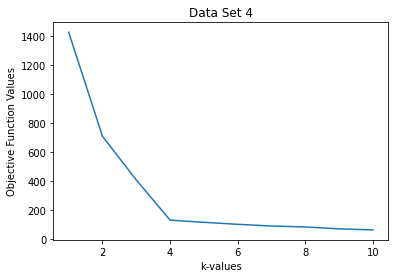

In [43]:
#dataset 4
smallest_obj_func = 0
smallest_obj_clusters_resultant = np.empty(0)

k_values = np.empty(0)
objective_funcs = np.empty(0)

for i in range(1, 11):
    k_values = np.append(k_values, i)

for k in range(1,11):
    #print(f'k = {k}')
    for i in range(10):
        #print(f'i = {i}')
        initial_clusters = cluster_initialization(dataset4, k)
        resultant_cluster_centers, obj_function = kmeans(dataset4, initial_clusters)
        if(i == 0):
            smallest_obj_func = obj_function
            smallest_obj_clusters_resultant = resultant_cluster_centers
        else:
            if(obj_function < smallest_obj_func):
                smallest_obj_func = obj_function
                smallest_obj_clusters_resultant = resultant_cluster_centers
    objective_funcs = np.append(objective_funcs, smallest_obj_func)
                
plt.plot(k_values, objective_funcs)
plt.xlabel('k-values')
plt.ylabel('Objective Function Values')
plt.title('Data Set 4')
plt.show()

/var/folders/tn/p0h712x12l100kjgf9shvdww0000gn/T/ipykernel_37696/3369764784.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(np.all(ass == prev_ass)):


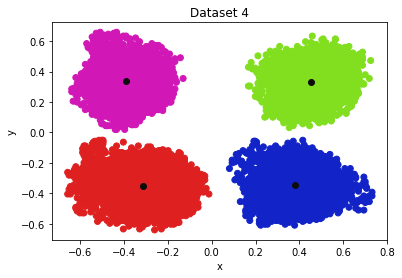

In [68]:
#dataset 4
colors_defs = ['#DF2020', '#81DF20', '#0D0D0D', '#1224C7', '#D117B5']
x_vals = np.empty(0)
for i in range(dataset4.size//2):
    x_vals = np.append(x_vals, dataset4[i][0])
    
y_vals = np.empty(0)
for i in range(dataset4.size//2):
    y_vals = np.append(y_vals, dataset4[i][1])
    
prev_ass = np.empty(0)
i=0
cluster_centres = cluster_initialization(dataset4, 4)
    
while True:
    ass = assign_clusters(dataset4, cluster_centres)
    ass = ass.astype(np.int32)
    cluster_centres = calculate_cluster_centers(dataset4, ass, cluster_centres, cluster_centres.size//2)
    if(np.all(ass == prev_ass)):
        break
    prev_ass = ass
    
x_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    x_vals_centroids = np.append(x_vals_centroids, cluster_centres[i][0])
    
y_vals_centroids = np.empty(0)
for i in range(cluster_centres.size//2):
    y_vals_centroids = np.append(y_vals_centroids, cluster_centres[i][1])
    
colors = np.empty(0)
for i in range(dataset4.size//2):
    if(ass[i] == 0):
        colors = np.append(colors, colors_defs[0])
    elif(ass[i] == 1):
        colors = np.append(colors, colors_defs[1])
    elif(ass[i] == 2):
        colors = np.append(colors, colors_defs[3])
    elif(ass[i] == 3):
        colors = np.append(colors, colors_defs[4])

import matplotlib.pyplot as plt
plt.scatter(x_vals, y_vals, c=colors)
plt.scatter(x_vals_centroids, y_vals_centroids, c=colors_defs[2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset 4')
plt.show()